<h1>Packages Implementation</h1>

In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style='darkgrid', palette='Dark2')

#plotly
import plotly.express as px
import plotly.graph_objects as go

#geopandas
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd
from shapely.ops import nearest_points
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

#time
import time

#scipy.stats`
from scipy.stats import pearsonr
from scipy.stats import f_oneway

<h1>Preprocessing and Exploratory Data Analysis</h1>

<h3>Data importation</h3>

In [ ]:
df_guncrimes = pd.read_csv('project_1_data/gun_incidents_usa.csv')
educ = pd.read_csv('project_1_data/educational_data.csv',sep = ',')
unempl=pd.read_excel('project_1_data/SeriesReport-20231225140442_7e70d1 (1).xlsx')
popul = pd.read_excel('project_1_data/statistic_id1067138_population_of_the_united_states_1610_2020.xlsx')

<h3>Data Analysis</h3>

<h4>Columns Check</h4>

In [ ]:
df_guncrimes.columns

Index(['incident_id', 'date', 'state', 'city', 'address', 'n_killed',
       'n_injured'],
      dtype='object')

In [ ]:
popul.columns

Index(['Year', 'Population'], dtype='object')

In [ ]:
educ.columns

Index(['Unnamed: 0', 'Year', 'Age_Range', 'Sex', 'Total', 'No_HS_Diploma',
       'HS_Diploma', 'Some_College_No_Degree', 'Associate', 'Bachelor',
       'Advanced'],
      dtype='object')

In [ ]:
unempl.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Total'],
      dtype='object')

By checking the necessity of columns, we considered that every column is necessary. In the first place we thought that adress could have city and state inside it, but it is just street adress so we are keeping every column we have

<h4>Setting Indexes</h4>

In [ ]:
df_guncrimes.set_index('incident_id', inplace= True)

<h4>Dtypes Check</h4>

In [ ]:
df_guncrimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308490 entries, 2314858 to 461105
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       308490 non-null  object
 1   state      308490 non-null  object
 2   city       308490 non-null  object
 3   address    308490 non-null  object
 4   n_killed   308490 non-null  int64 
 5   n_injured  308490 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 16.5+ MB


In [ ]:
educ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              45 non-null     int64 
 1   Year                    45 non-null     int64 
 2   Age_Range               45 non-null     object
 3   Sex                     45 non-null     object
 4   Total                   45 non-null     int64 
 5   No_HS_Diploma           45 non-null     int64 
 6   HS_Diploma              45 non-null     int64 
 7   Some_College_No_Degree  45 non-null     int64 
 8   Associate               45 non-null     int64 
 9   Bachelor                45 non-null     int64 
 10  Advanced                45 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 4.0+ KB


In [ ]:
popul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        8 non-null      int64
 1   Population  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [ ]:
unempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10 non-null     int64  
 1   Jan     10 non-null     float64
 2   Feb     10 non-null     float64
 3   Mar     10 non-null     float64
 4   Apr     10 non-null     float64
 5   May     10 non-null     float64
 6   Jun     10 non-null     float64
 7   Jul     10 non-null     float64
 8   Aug     10 non-null     float64
 9   Sep     10 non-null     float64
 10  Oct     10 non-null     float64
 11  Nov     10 non-null     float64
 12  Dec     10 non-null     float64
 13  Total   10 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.2 KB


<p>Taking into account non-null variables we can consume that there are no missing values.</p>

<h4>Changing Dtypes & Adding Columns</h4>

In [ ]:
df_guncrimes['date'] = pd.to_datetime(df_guncrimes['date'])

In [ ]:
df_guncrimes['Year'] = df_guncrimes['date'].dt.year

In [ ]:
df_guncrimes['Month'] = df_guncrimes['date'].dt.strftime('%b')

<h4>Checking Outliers</h4>

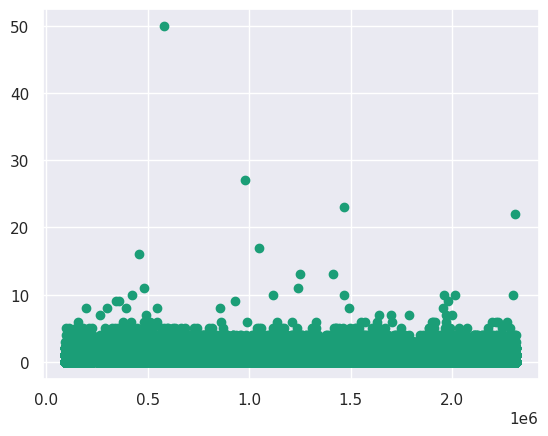

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_guncrimes['n_killed'],marker='o', linestyle='None')
plt.show()

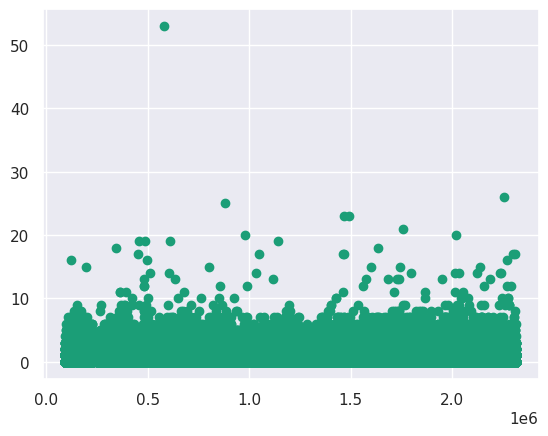

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_guncrimes['n_injured'],marker='o', linestyle='None')
plt.show()

In this case there could not be outliers, because there could be any number of deathes and injures.

<h1>Working with Advanced Topics</h1>

<h2>Time Intelligence</h2>

<h4>Mean Time between Shootings by State</h4>

In [ ]:
# Sort the DataFrame by date within each state
df_guncrimes.sort_values(['state', 'date'], inplace=True)
# Calculate the time difference between consecutive shootings within each state
df_guncrimes['time_diff'] = df_guncrimes.groupby('state')['date'].diff()
# Drop rows where 'time_diff' is NaN (i.e., the first shooting in each state)
df_guncrimes.dropna(subset=['time_diff'], inplace=True)
# Calculate the mean time difference between shootings for each state
mean_time_between_shootings = df_guncrimes.groupby('state')['time_diff'].mean()
print(mean_time_between_shootings)

state
Alabama                 0 days 09:47:32.676551897
Alaska                  4 days 15:13:35.709969788
Arizona                 0 days 20:45:52.831168831
Arkansas                0 days 21:17:16.300578034
California              0 days 03:50:29.477020602
Colorado                0 days 21:55:42.994139584
Connecticut             1 days 02:09:32.506738544
Delaware                1 days 23:28:53.800350262
District of Columbia    0 days 21:16:17.731529656
Florida                 0 days 04:54:57.401488349
Georgia                 0 days 07:34:45.060263477
Hawaii                 11 days 11:24:40.754716981
Idaho                   6 days 03:50:45.030425963
Illinois                0 days 02:51:26.002663489
Indiana                 0 days 10:08:45.507900677
Iowa                    1 days 17:08:06.703910614
Kansas                  1 days 08:12:07.754763877
Kentucky                0 days 15:17:50.493685419
Louisiana               0 days 07:21:30.309833857
Maine                   8 days 02:51:52.9973

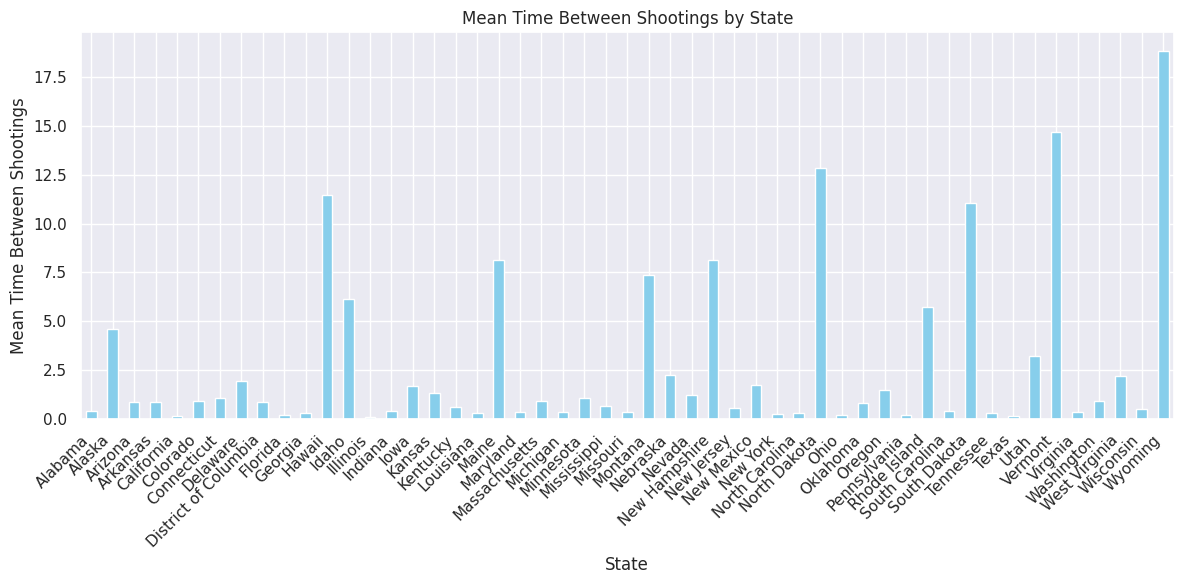

In [ ]:
df_guncrimes['time_diff_int'] = df_guncrimes['time_diff'].dt.days.astype('int')
mean_time_between_shootings_int = df_guncrimes.groupby('state')['time_diff_int'].mean()

plt.figure(figsize=(12, 6))
mean_time_between_shootings_int.plot(kind='bar', color='skyblue')
plt.title('Mean Time Between Shootings by State')
plt.xlabel('State')
plt.ylabel('Mean Time Between Shootings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

<h4>Present a Weekly Time-Series Visualization for that State</h4>

<ipython-input-213-aeada52040d3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = state_df.resample('W-Mon', on='date').sum()


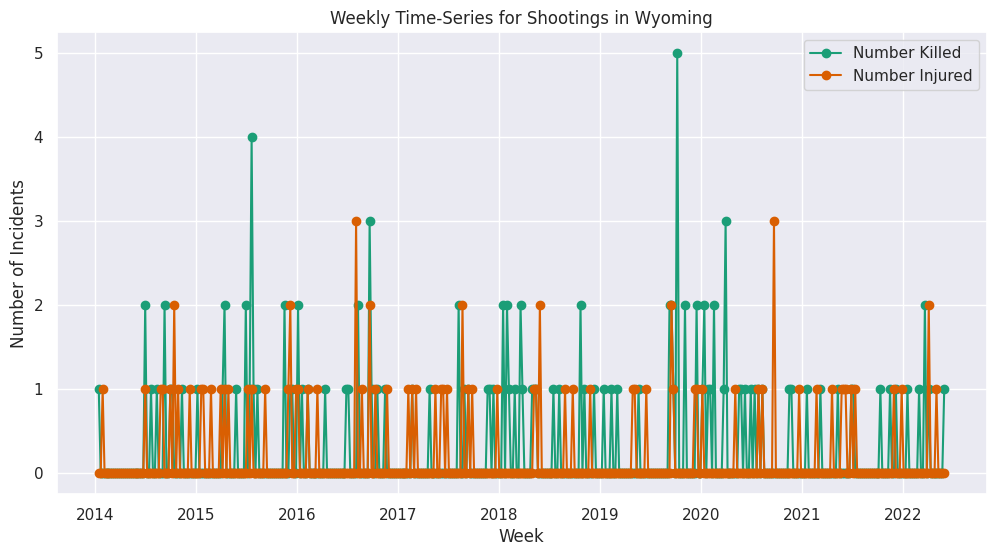

In [ ]:
state_df = df_guncrimes[df_guncrimes['state'] == 'Wyoming']

# Resample the data to weekly frequency and sum the number of incidents for each week
weekly_data = state_df.resample('W-Mon', on='date').sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['n_killed'], label='Number Killed', marker='o')
plt.plot(weekly_data.index, weekly_data['n_injured'], label='Number Injured', marker='o')
plt.title('Weekly Time-Series for Shootings in Wyoming')
plt.xlabel('Week')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

<h4>Identify Seasonal and Trend Components while Drawing some Conclusions</h4>

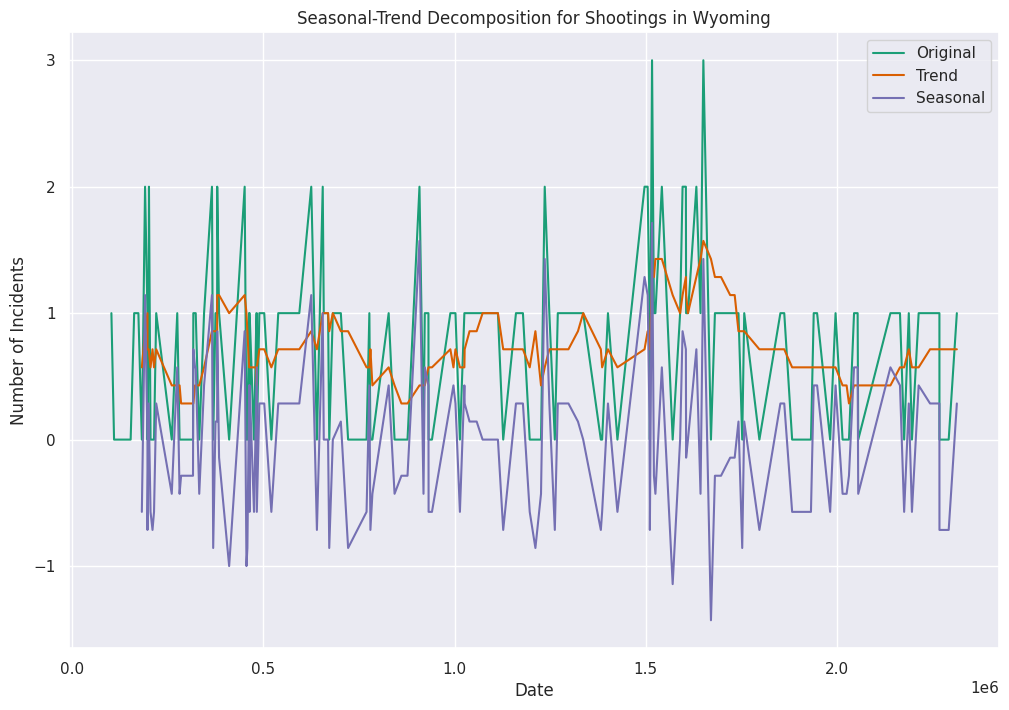

In [ ]:
time_series = state_df['n_killed']

# Calculate rolling mean for trend (you can adjust the window size)
trend = time_series.rolling(window=7).mean()

# Calculate the seasonal component (difference between original and trend)
seasonal = time_series - trend

# Plot the original time series, trend, and seasonal components
plt.figure(figsize=(12, 8))
sns.lineplot(data=time_series, label='Original')
sns.lineplot(data=trend, label='Trend')
sns.lineplot(data=seasonal, label='Seasonal')
plt.title('Seasonal-Trend Decomposition for Shootings in Wyoming')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

<h4>Is there any Seasonal Correlation with the Number of Persons Killed or Injured?</h4>

<ipython-input-215-46ff9274d3f9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_index.resample('M').sum()


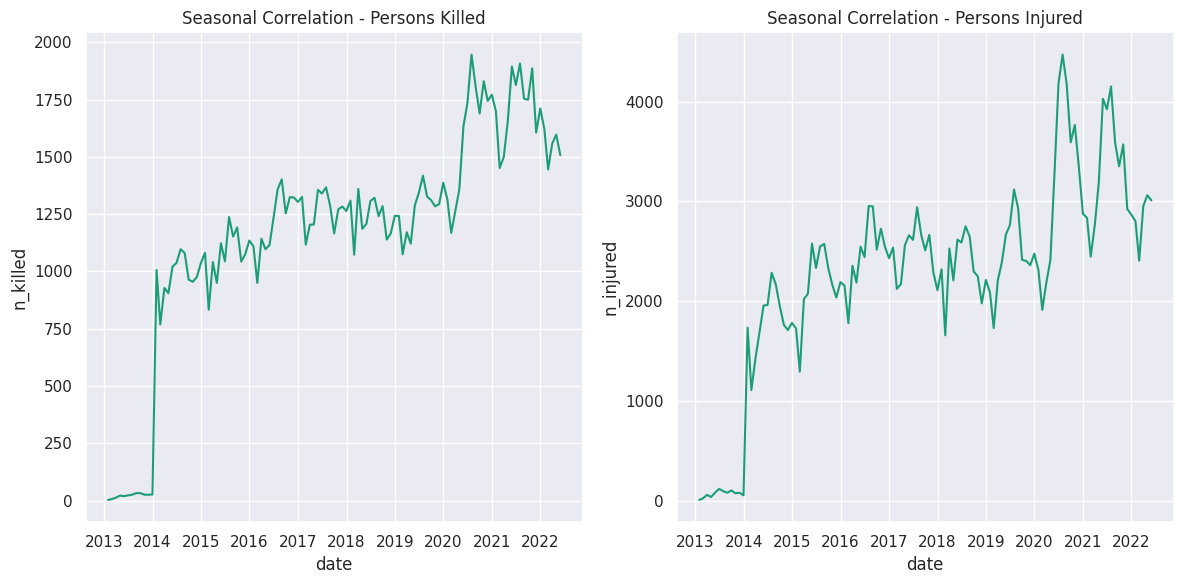

In [ ]:
df_index=df_guncrimes.set_index('date')

#Resample the data on a monthly basis and sum the values for each month
df_monthly = df_index.resample('M').sum()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot for the number of persons killed
plt.subplot(1, 2, 1)
sns.lineplot(x=df_monthly.index, y='n_killed', data=df_monthly)
plt.title('Seasonal Correlation - Persons Killed')

# Plot for the number of persons injured
plt.subplot(1, 2, 2)
sns.lineplot(x=df_monthly.index, y='n_injured', data=df_monthly)
plt.title('Seasonal Correlation - Persons Injured')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h4>It Resamples the Data on a Monthly Basis and Plots the Trends for Persons Killed and Injured Separately</h4>

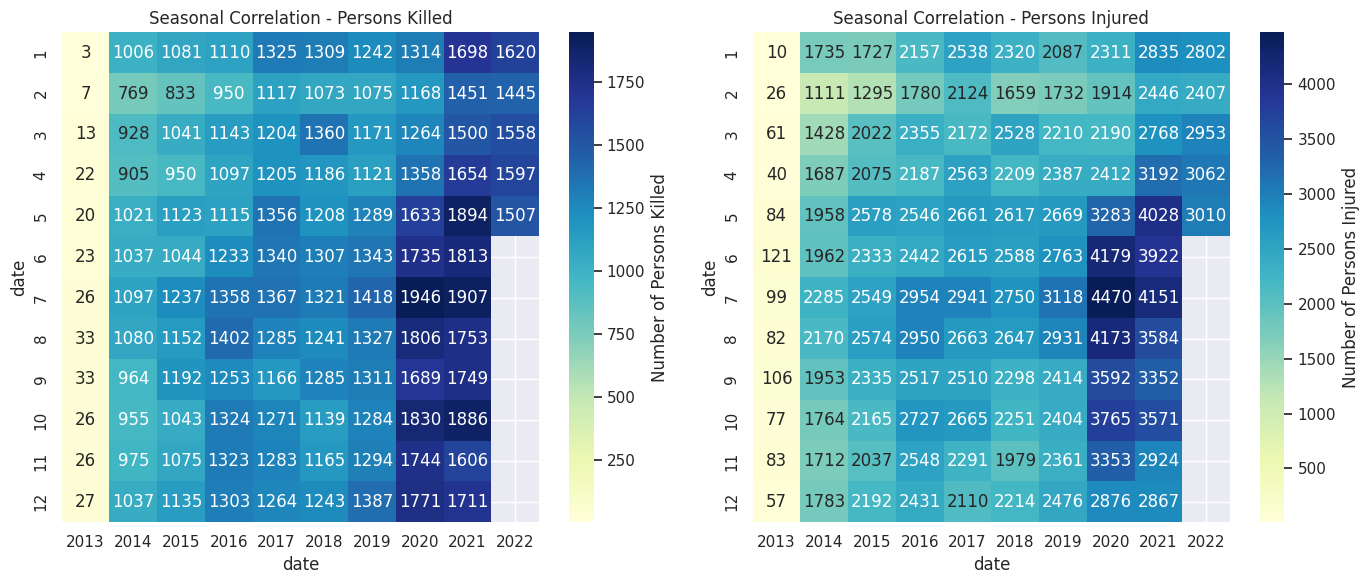

In [ ]:
# Create a pivot table for better visualization
df_pivot = df_monthly.pivot_table(index=df_monthly.index.month, columns=df_monthly.index.year,
                                  values=['n_killed', 'n_injured'], aggfunc='sum')

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot heatmap for the number of persons killed
plt.subplot(1, 2, 1)
sns.heatmap(df_pivot['n_killed'], cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Persons Killed'})
plt.title('Seasonal Correlation - Persons Killed')

# Plot heatmap for the number of persons injured
plt.subplot(1, 2, 2)
sns.heatmap(df_pivot['n_injured'], cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Persons Injured'})
plt.title('Seasonal Correlation - Persons Injured')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

A heatmap where each cell represents the number of persons killed or injured in a specific month and year. The x-axis represents the year, and the y-axis represents the month. The intensity of the color indicates the magnitude of the values.

<h4>Is there a Correlation between Number of Killed/Injured and the Growth of Poorly Educated People</h4>

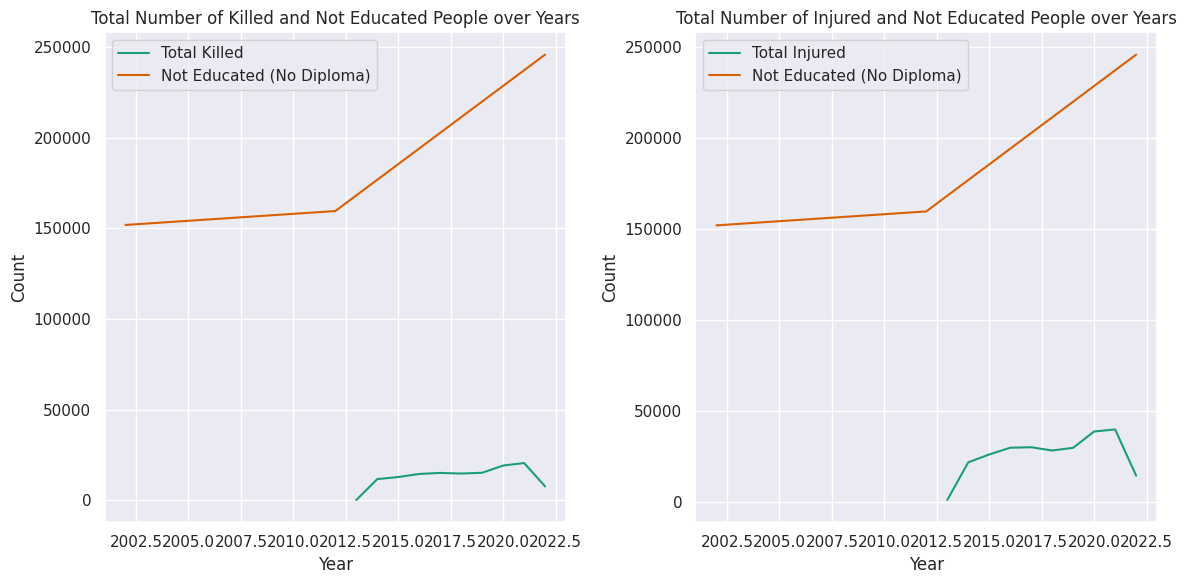

In [ ]:
data = df_guncrimes[['Year', 'n_killed', 'n_injured']]
data_educ = educ[['Year', 'No_HS_Diploma','Some_College_No_Degree']]

# Group data by 'Year' and sum the values
grouped_data = data.groupby('Year').sum().reset_index()
grouped_data_educ = data_educ.groupby('Year').sum().reset_index()
grouped_data_educ['No_Education'] = grouped_data_educ['No_HS_Diploma']+grouped_data_educ['Some_College_No_Degree']
# Create line plots
plt.figure(figsize=(12, 6))

# Plot for total number of killed
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='n_killed', data=grouped_data, label='Total Killed')
sns.lineplot(x='Year', y='No_Education', data=grouped_data_educ, label='Not Educated (No Diploma)')
plt.title('Total Number of Killed and Not Educated People over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Plot for total number of injured
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='n_injured', data=grouped_data, label='Total Injured')
sns.lineplot(x='Year', y='No_Education', data=grouped_data_educ, label='Not Educated (No Diploma)')
plt.title('Total Number of Injured and Not Educated People over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

As we can see, there is no obvious correlation between level of not educated people and number of shootings, but if look closely maybe a little guncrime increased from increasing amount of uneducated people. From this we can not make the fact that the number of uneducated people make difference in guncrime situation, because this difference is miserable.


<h4>Is there a Correlation between Number of Killed/Injured and the Population Growth over the Years</h4>

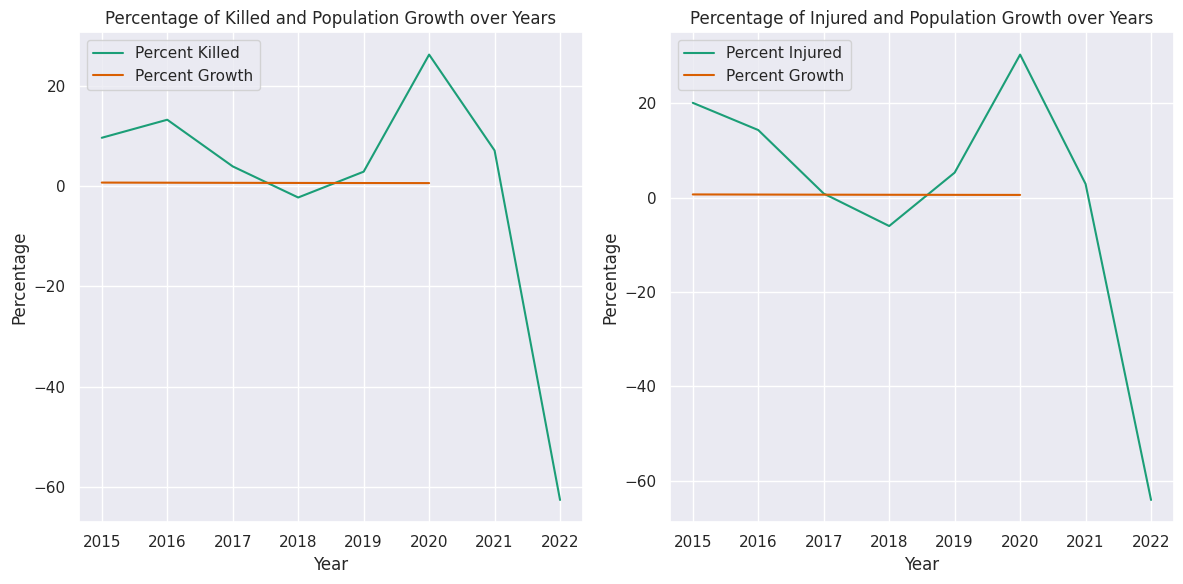

In [ ]:
total_counts_by_year = df_guncrimes.groupby('Year')[['n_killed', 'n_injured']].sum().reset_index()

# Calculate the percentage of killed and injured by year
total_counts_by_year['percent_killed'] = (total_counts_by_year['n_killed'].pct_change()) * 100
total_counts_by_year['percent_injured'] = (total_counts_by_year['n_injured'].pct_change()) * 100
total_counts_by_year['percent_population_growth'] = (popul['Population'].pct_change()) * 100
total_counts_by_year.drop([0,1], inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for percent of killed
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='percent_killed', data=total_counts_by_year, label='Percent Killed')
sns.lineplot(x='Year', y='percent_population_growth', data=total_counts_by_year, label='Percent Growth')
plt.title('Percentage of Killed and Population Growth over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()

# Plot for percent of injured
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='percent_injured', data=total_counts_by_year, label='Percent Injured')
sns.lineplot(x='Year', y='percent_population_growth', data=total_counts_by_year, label='Percent Growth')
plt.title('Percentage of Injured and Population Growth over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()

plt.tight_layout()
plt.show()

As we can see, there is no obvious correlation between population growth and number of shootings.

<h4>Is there a Correlation between Number of Killed/Injured and the Unempoyment Rate over the Years</h4>

<ipython-input-227-0c097d527006>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_percentage_by_month = df_guncrimes.groupby(['Year','Month Number','Month'])['n_injured','n_killed'].sum()


"\nplt.title('Percentage Change of Number of Killed and Unemployment Rate')\nplt.xlabel('Month')\nplt.ylabel('Percentage Change')\nplt.legend()\n\n# Second line chart\nplt.subplot(2, 2, 2)\n\n# Plotting\nplt.plot(df_guncrimes['Month'], df_guncrimes['Injured_Percent_Change'], label='Injured Percent Change', marker='o')\nplt.plot(df_guncrimes['Month'].unique()[1:], unempl_change.values[1:], label='Unemployment Rate Change', marker='o')\n\nplt.title('Percentage Change of Number of Injured and Unemployment Rate')\nplt.xlabel('Month')\nplt.ylabel('Percentage Change')\nplt.legend()\n\nplt.tight_layout()\nplt.show()\n"

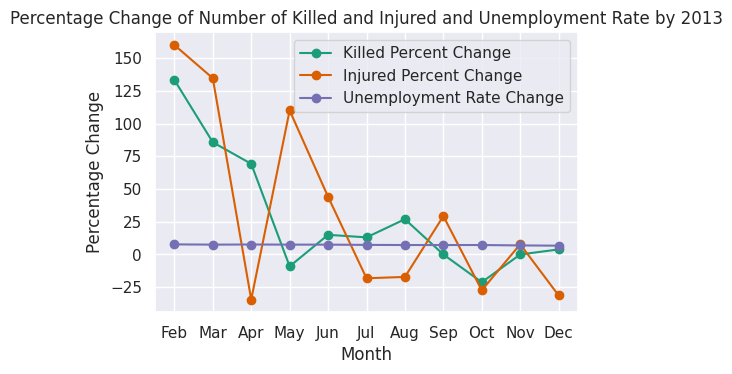

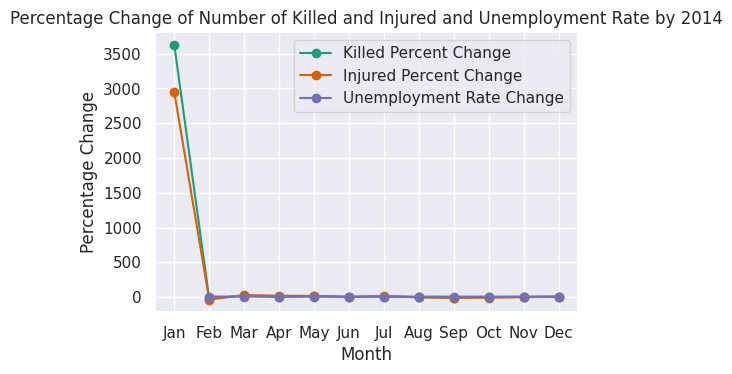

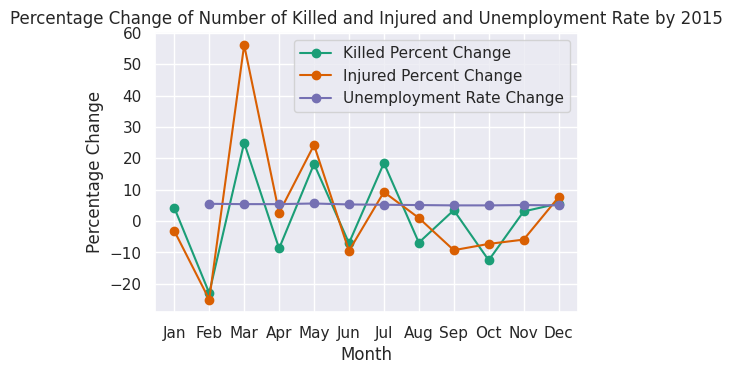

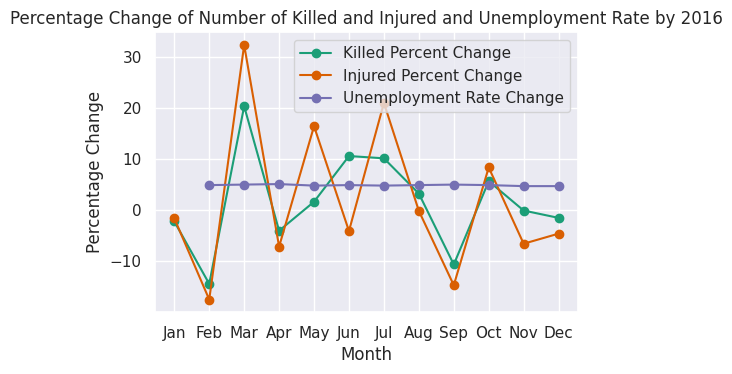

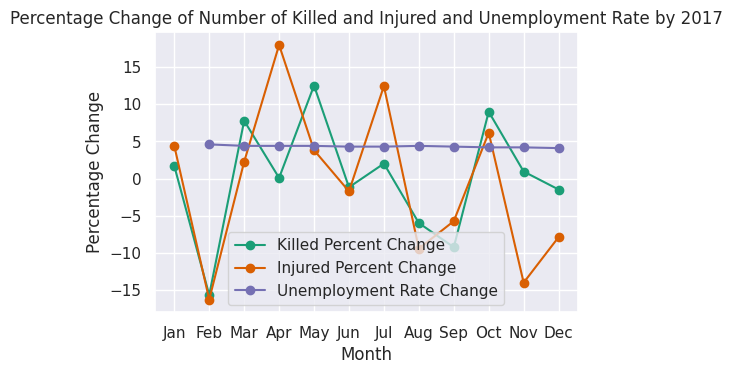

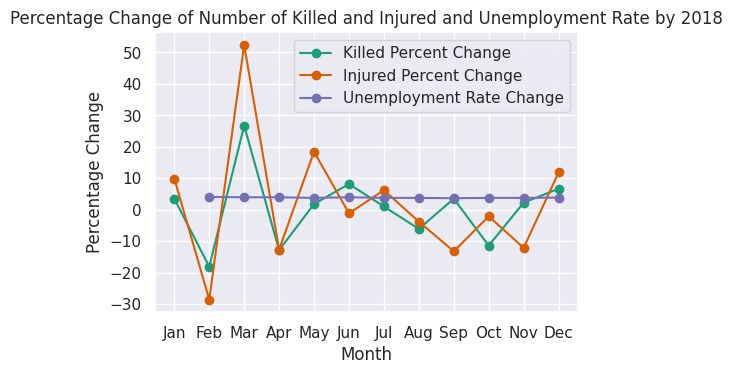

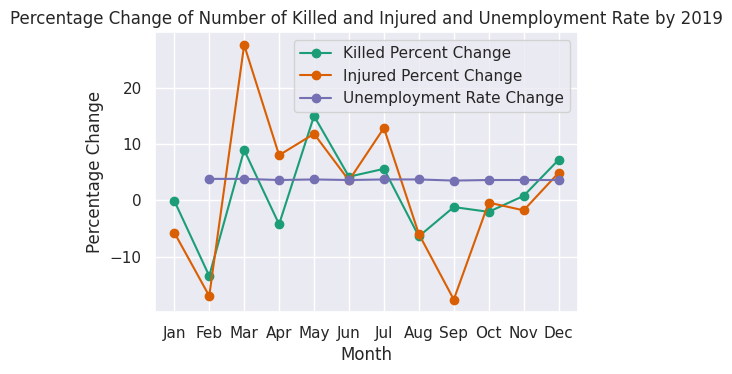

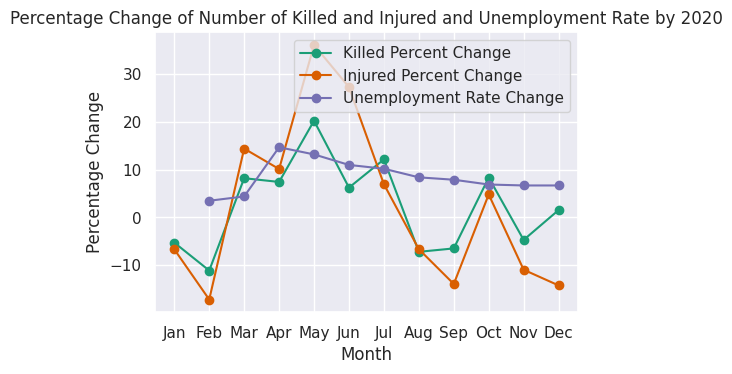

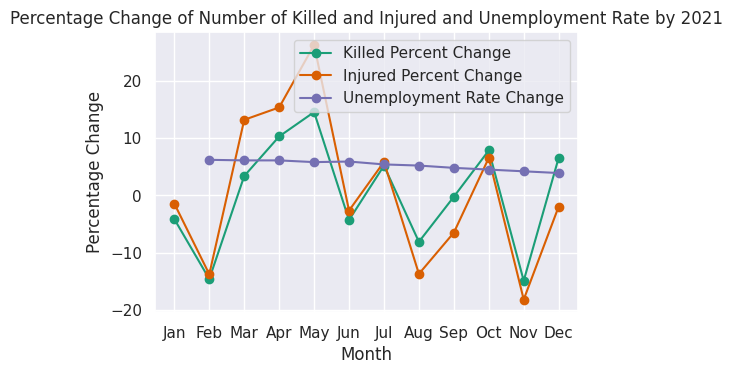

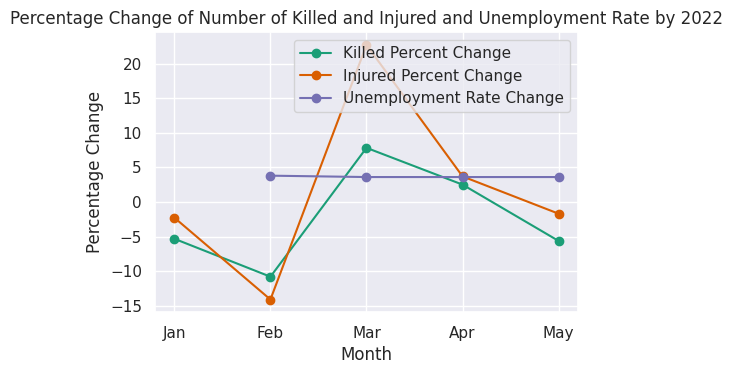

In [ ]:
# First line chart
#plt.figure(figsize=(12, 8))
#plt.subplot(2, 2, 1)

month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_guncrimes['Month Number'] = df_guncrimes['Month'].map(month_to_num)
df_percentage_by_month = df_guncrimes.groupby(['Year','Month Number','Month'])['n_injured','n_killed'].sum()
df_percentage_by_month.reset_index(inplace=True)
df_percentage_by_month.drop('Month Number', axis=1, inplace=True)
# Calculate percentage change for number of killed and unemployment rate
df_percentage_by_month['Injured_Percent_Change'] = df_percentage_by_month['n_injured'].pct_change() * 100
df_percentage_by_month['Killed_Percent_Change'] = df_percentage_by_month['n_killed'].pct_change() * 100
unempl_melted = unempl.melt(id_vars='Year', var_name='Month', value_name='Unemployment_Rate')
df_percentage_by_month = pd.merge(df_percentage_by_month, unempl_melted, on=['Year', 'Month'], how='left')

for year in range(2013,2023):
  df_by_year = df_percentage_by_month[df_percentage_by_month['Year'] == year]
  # Plotting
  plt.figure(figsize=(12, 8))
  plt.subplot(2, 2, 1)
  plt.plot(df_by_year['Month'], df_by_year['Killed_Percent_Change'], label='Killed Percent Change', marker='o')
  plt.plot(df_by_year['Month'], df_by_year['Injured_Percent_Change'], label='Injured Percent Change', marker='o')
  plt.plot(df_by_year['Month'].unique()[1:], df_by_year['Unemployment_Rate'].values[1:], label='Unemployment Rate Change', marker='o')
  plt.title(f'Percentage Change of Number of Killed and Injured and Unemployment Rate by {year}')
  plt.xlabel('Month')
  plt.ylabel('Percentage Change')
  plt.legend()

As we can see, there is no obvious correlation between unemployment rate change and number of shootings. But there was something when the covid strikes. In 2020 graphic we can see that when isolation started in the USA the number of shothing and numbers of killed and injured increased dramtically and then decreasing to the autumn.